In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
#from tqdm import tqdm

DATADIR = "C:/Users/Sanket/Desktop/dataset"

CATEGORIES = ["LED", "Capacitor"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

<Figure size 640x480 with 1 Axes>

In [5]:
print(img_array)

[[11 12 13 ... 17 14  5]
 [13 14 16 ... 21 13  1]
 [15 16 18 ... 19 16  8]
 ...
 [ 3  5  4 ...  8  8 12]
 [ 4  3  4 ...  0  0  0]
 [ 6  3  4 ...  4  5 10]]


In [6]:
print(img_array.shape)

(128, 256)


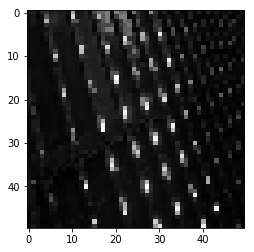

In [7]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in os.listdir(path):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])
            except Exception as e:  
                pass
            
create_training_data()

In [9]:
print(len(training_data))

883


In [10]:
import random

random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
1
1
0
0
0
1


In [12]:
X = []
y = []

In [13]:
for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [14]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [15]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [16]:
X[1]

array([[[28],
        [30],
        [31],
        ...,
        [34],
        [33],
        [33]],

       [[35],
        [33],
        [31],
        ...,
        [31],
        [35],
        [34]],

       [[40],
        [35],
        [34],
        ...,
        [39],
        [41],
        [37]],

       ...,

       [[30],
        [27],
        [26],
        ...,
        [29],
        [30],
        [27]],

       [[34],
        [31],
        [31],
        ...,
        [35],
        [34],
        [34]],

       [[34],
        [31],
        [29],
        ...,
        [35],
        [34],
        [37]]], dtype=uint8)

In [17]:
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import numpy
import pickle

seed = 7
numpy.random.seed(seed)

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('sigmoid'))

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.3)

scores=model.evaluate(X_test, y_test, verbose=0)

print("test loss,test acc: ", scores)

model.summary()

model.save('64x3-CNN.model6')

C:\Users\Sanket\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 413 samples, validate on 178 samples
Epoch 1/10
413/413 [==============================] - 19s 46ms/step - loss: 0.6921 - acc: 0.5823 - val_loss: 0.6738 - val_acc: 0.5674
Epoch 2/10
413/413 [==============================] - 13s 30ms/step - loss: 0.6427 - acc: 0.6453 - val_loss: 0.5855 - val_acc: 0.6657
Epoch 3/10
413/413 [==============================] - 12s 29ms/step - loss: 0.5638 - acc: 0.7167 - val_loss: 0.5313 - val_acc: 0.6685
Epoch 4/10
413/413 [==============================] - 12s 29ms/step - loss: 0.5062 - acc: 0.7276 - val_loss: 0.5164 - val_acc: 0.7640
Epoch 5/10
413/413 [==============================] - 13s 33ms/step - loss: 0.4648 - acc: 0.7591 - val_loss: 0.5415 - val_acc: 0.7163
Epoch 6/10
413/413 [==============================] - 13s 32ms/step - loss: 0.4528 - acc: 0.7615 - val_loss: 0.5214 - val_acc: 0.7612
Epoch 7/10
413/413 [==============================] - 13s 31ms/step - loss: 0.4525 - acc: 0.7676 - val_loss: 0.5135 - val_acc: 0.7247
Epoch 8/10
413/4

In [3]:
import cv2
import tensorflow as tf
import numpy as np
CATEGORIES = ["LED","Capacitor"]


def prepare(filepath):
    IMG_SIZE = 50  
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("64x3-CNN.model6")

prediction = model.predict([prepare('C:/Users/Sanket/Desktop/Projects/Task/capacitor.jpg')])
print(prediction)
print("Predicted Component:", end="")
print(CATEGORIES[int(np.argmax(prediction))])


[[6.8890954e-06 9.9997973e-01]]
Predicted Component:Capacitor
